In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('src/')
from utils.methods import *

In [2]:
# Set a consistent style for the plots
sns.set_theme(style="whitegrid")

In [3]:
# Prefix path
PREFIX_PATH = 'data'

In [4]:
# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display 50 rows
pd.set_option('display.max_rows', 50)

# Importing the final dataset
df = pd.read_csv(f'{PREFIX_PATH}/final_data_complete.csv')

In [5]:
df['Genres'] = df['Genres'].apply(str_to_list)
df['merge_year'] = df['merge_year'].astype('Int64')

In [6]:
emotion = pd.DataFrame(list(df['distilbert_emotions'].apply(conv_to_dict)))
emotions_df = pd.concat([df, emotion], axis=1)

# What are the predominant emotional tones used in films and how do they vary across different movie genres?

In [7]:
emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']

In [8]:
emotion_by_time = emotions_df.groupby('merge_year').agg({
    emotion: ['mean'] for emotion in emotions
})
emotion_by_time.columns = emotions

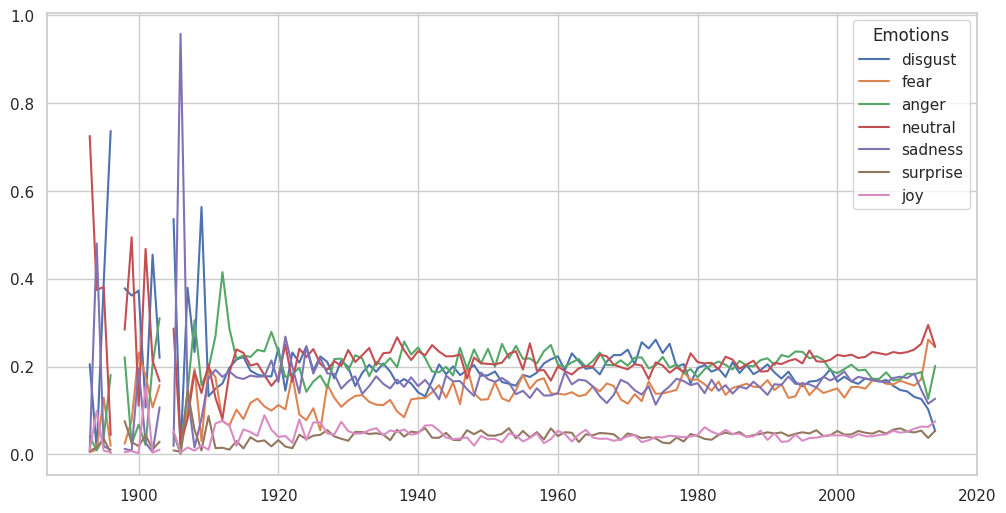

In [9]:
plt.figure(figsize=(12, 6))

for column in emotion_by_time.columns:
    plt.plot(emotion_by_time.index, emotion_by_time[column], label=column)

plt.legend(title='Emotions', loc='best')

<Axes: xlabel='merge_year', ylabel='Count'>

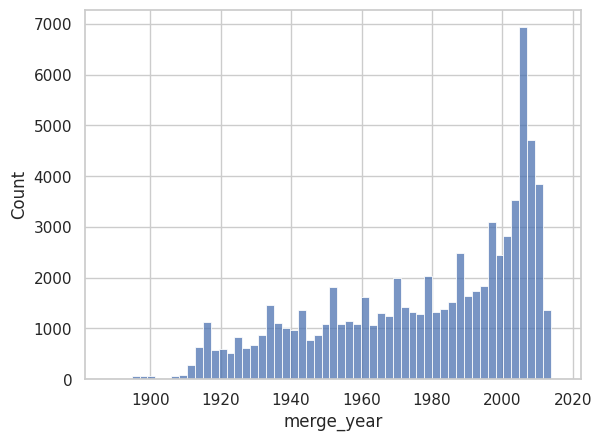

In [10]:
sns.histplot(emotions_df['merge_year'], kde=False)

In [11]:
movie_counts = emotions_df.groupby(['merge_year']).agg(
    counts=('merge_year', 'size')
)
movie_counts[movie_counts.index >= 2010]

,counts
merge_year,
2010,2024
2011,1824
2012,1195
2013,164
2014,17
2015,4
2016,3


In [12]:
emotion_by_time = emotion_by_time[(emotion_by_time.index >= 1925) & (emotion_by_time.index <= 2012)]

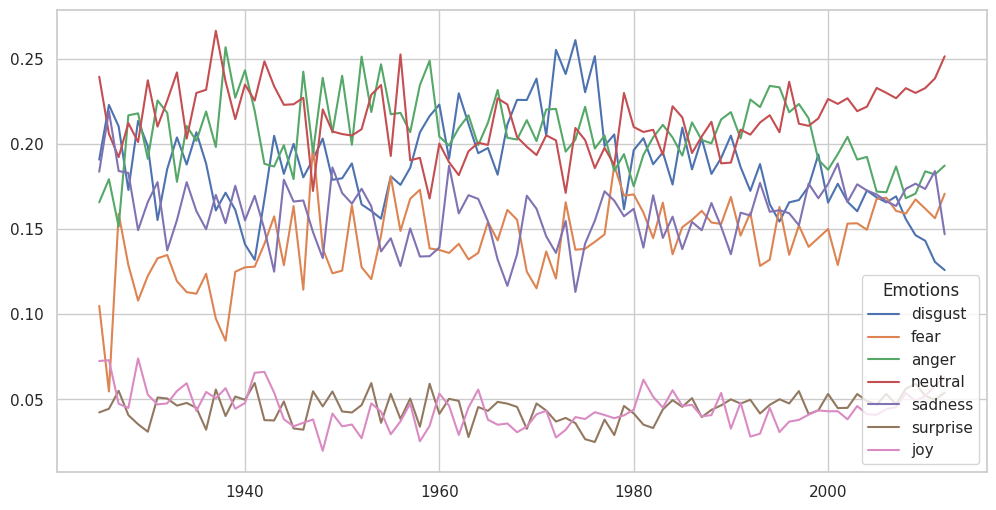

In [13]:
plt.figure(figsize=(12, 6))

for column in emotion_by_time.columns:
    plt.plot(emotion_by_time.index, emotion_by_time[column], label=column)

plt.legend(title='Emotions', loc='best')

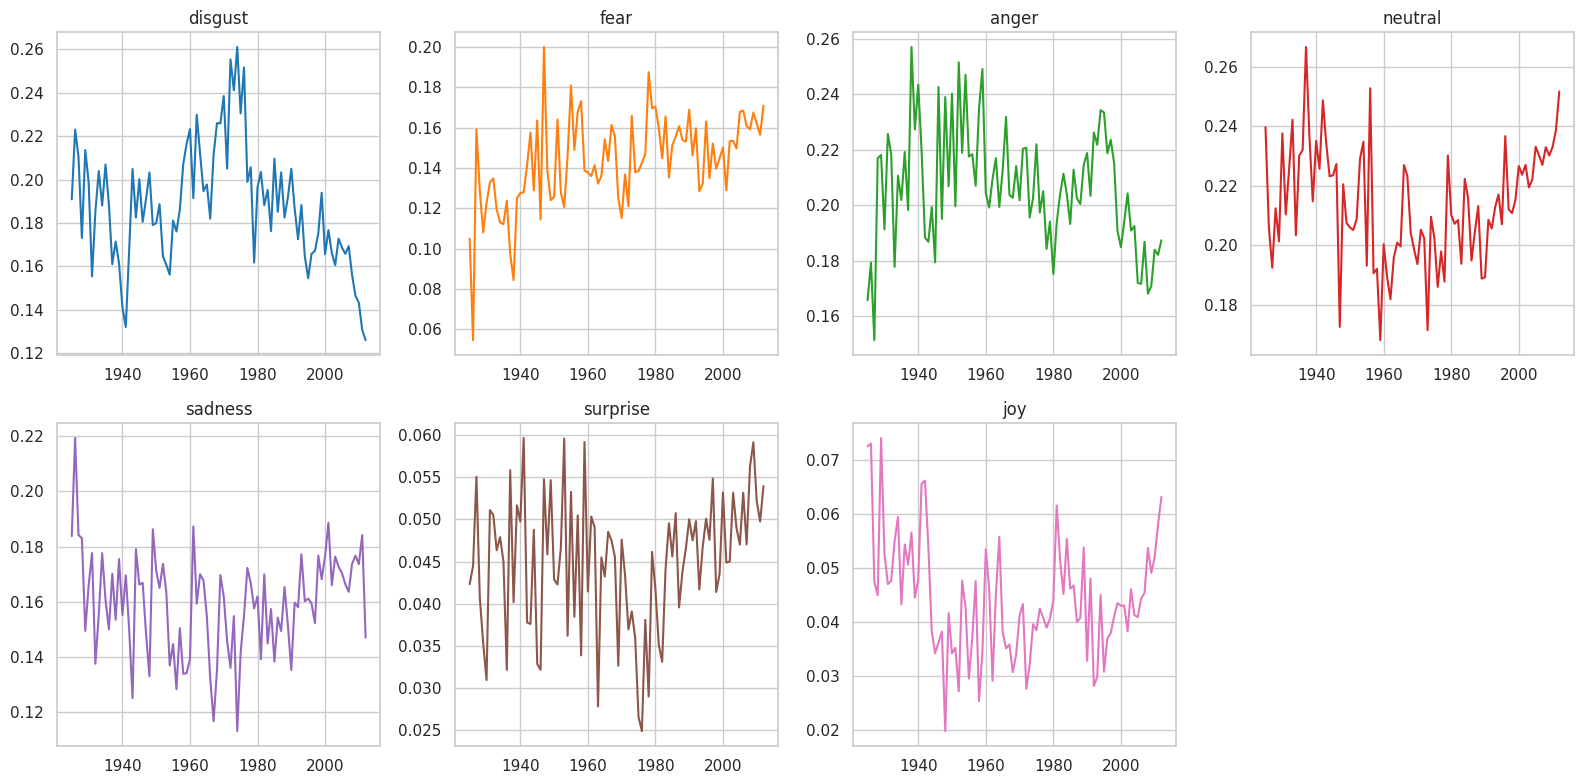

In [14]:
num_emotions = len(emotion_by_time.columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
colors = sns.color_palette("tab10", len(emotion_by_time.columns))

for ax, column, color in zip(axes, emotion_by_time.columns, colors):
    ax.plot(emotion_by_time.index, emotion_by_time[column], color=color)
    ax.set_title(column)

for ax in axes[num_emotions: ]:
    ax.axis('off')

plt.tight_layout()
plt.show()

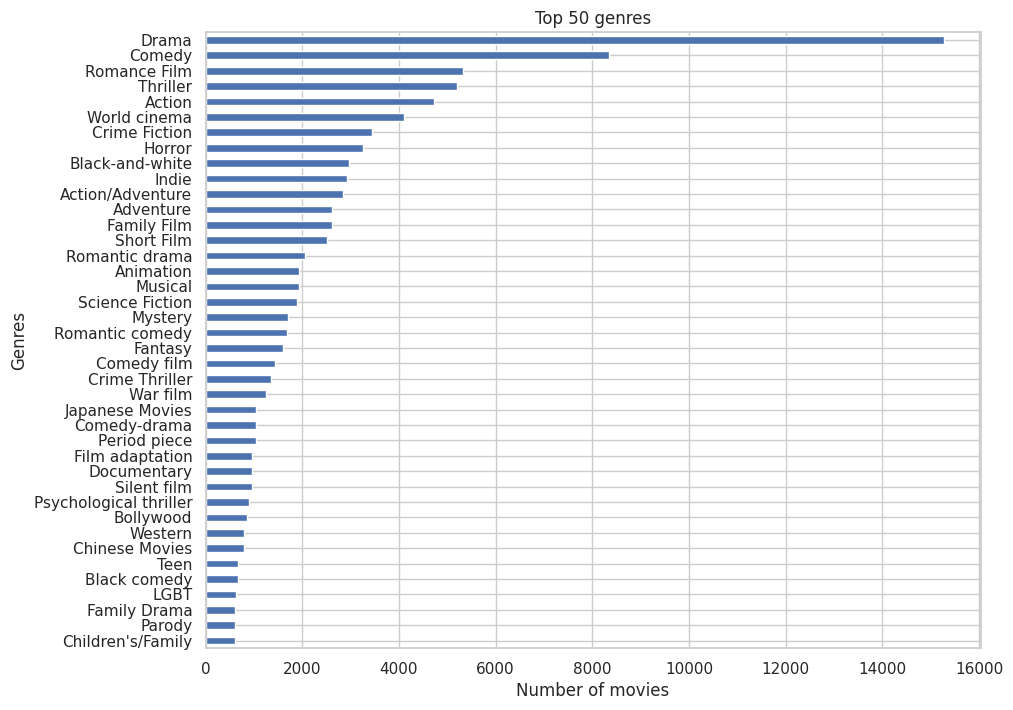

In [15]:
columns_needed = ['Plot', 'Genres', 'merge_year', 'distilbert_emotions']

# we take only the films were the plot is not missing
df_with_plot = df.dropna(subset=['Plot'])[columns_needed]

genre_count = df_with_plot['Genres'].explode().value_counts()

# plot the genre distribution first 50 genres on an orizontal bar plot
plt.figure(figsize=(10, 8))
genre_count[:40].sort_values().plot(kind='barh')
plt.title('Top 50 genres')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.show()

To choose the relevant genres, we see that there is quite a natural cluster for genres that belong to more than 2000 Movies. To make analysis that have significant results, we choose only those genres that have more than 2000 movies.

In [16]:
relevant_genres = genre_count[genre_count > 2000].index
temp = df_with_plot.explode('Genres')
df_plot_genres = temp[temp['Genres'].isin(relevant_genres)].reset_index(drop=True)
# df_plot_genres

In [17]:
temp = pd.DataFrame(list(df_plot_genres['distilbert_emotions'].apply(conv_to_dict))).reset_index(drop=True)

emotions_df = pd.concat([df_plot_genres, temp], axis=1)

emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy'] 

temp = emotions_df.groupby('Genres').agg({
    emotion: ['mean'] for emotion in emotions
}).reset_index()
temp['count'] = emotions_df['Genres'].value_counts().sort_index().values

temp.columns = ['Genres'] + emotions + ['count']
final_df = temp.set_index('Genres')
final_df

,disgust,fear,anger,neutral,sadness,surprise,joy,count
Genres,,,,,,,,
Action,0.164581,0.157858,0.294362,0.207060,0.109015,0.039658,0.027467,4719
Action/Adventure,0.168214,0.164287,0.300741,0.202336,0.107800,0.036135,0.020486,2841
Adventure,0.146760,0.169830,0.226376,0.252786,0.124248,0.048896,0.031105,2608
Black-and-white,0.188865,0.140518,0.211064,0.209114,0.169323,0.041535,0.039581,2958
Comedy,0.159404,0.117332,0.193337,0.261184,0.155883,0.056790,0.056070,8348
Crime Fiction,0.197055,0.170661,0.277801,0.172240,0.124140,0.035676,0.022427,3436
Drama,0.179407,0.137836,0.197994,0.191499,0.206486,0.040810,0.045969,15267
Family Film,0.128007,0.134138,0.191569,0.278214,0.147508,0.063800,0.056763,2608
Horror,0.266120,0.301075,0.162985,0.140338,0.074354,0.044445,0.010683,3266


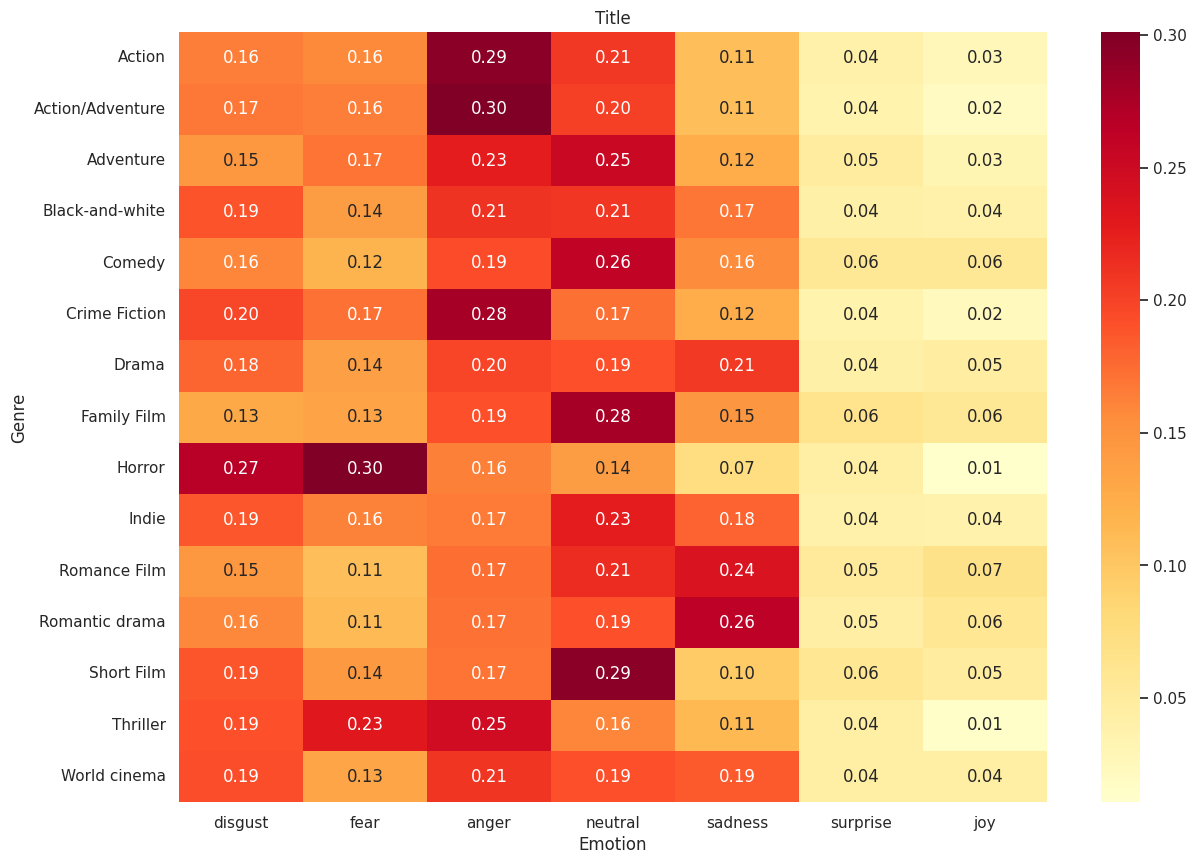

In [18]:
# emotion_data, emotion_data_grouped = prepare_heatmap(emotions_df)
plt.figure(figsize=(14, 10))
sns.heatmap(final_df.drop('count', axis=1), annot=True, fmt='.2f', cbar=True, cmap='YlOrRd')
plt.title('Title')
plt.ylabel('Genre')
plt.xlabel('Emotion')
plt.show()

In [19]:
from statsmodels.multivariate.manova import MANOVA

In [20]:
emotions_df['Genres'] = emotions_df['Genres'].astype('category')
emotions.remove('neutral')

In [21]:
manova = MANOVA.from_formula(f'{ " + ".join(emotions) } ~ Genres', data=emotions_df)
result = manova.mv_test()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.4863 6.0000 68168.0000 12002.9242 0.0000
         Pillai's trace 0.5137 6.0000 68168.0000 12002.9242 0.0000
 Hotelling-Lawley trace 1.0565 6.0000 68168.0000 12002.9242 0.0000
    Roy's greatest root 1.0565 6.0000 68168.0000 12002.9242 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
         Genres         Value   Num DF    Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.8607 84.0000 379954.0376 123.4368 0.0000
         Pillai's trace 0.1458 84.0000 409038.0000 121.2627 0.0000
 Hotelling-Lawley trace 0.1545 84.0000 279139.1349 125.4173 0.0000
    Roy's greatest root 0.0851 14.0000  68173.0000 414.3267 0.0000
==================================================================

"""

In [22]:
# temp = emotions_df.explode('Genres').groupby('Genres').agg({
#     emotion: ['mean'] for emotion in emotions
# }).reset_index()
# temp['count'] = emotions_df.explode('Genres')['Genres'].value_counts().sort_index().values


# temp.columns = ['Genres'] + emotions + ['count']
# final_df = temp.set_index('Genres')
# final_df
